In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
m = np.array([[0.0, 1.0], [-0.01, -0.1]])

In [4]:
np.linalg.eig(m)

(array([-0.05+0.08660254j, -0.05-0.08660254j]),
 array([[ 0.99503719+0.j        ,  0.99503719-0.j        ],
        [-0.04975186+0.08617275j, -0.04975186-0.08617275j]]))

In [5]:
d,v = np.linalg.eig(m)

In [6]:
v[:,1]

array([ 0.99503719-0.j        , -0.04975186-0.08617275j])

In [7]:
np.dot(m, v[:,1])/v[:,1]

array([-0.05-0.08660254j, -0.05-0.08660254j])

In [8]:
import quaternions

In [9]:
dir(quaternions)

['Quaternion',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'quaternion']

In [10]:
q = quaternions.Quaternion(0.5,0.51,0.5,0.5)

In [11]:
q2 = q * q.unit().inverse() # .norm()
str(q2), str(q2.unit())

('<1.0050373127401788, 5.551115123125783e-17, 5.551115123125783e-17, -8.326672684688674e-17>',
 '<1.0, 5.523292571089698e-17, 5.523292571089698e-17, -8.284938856634546e-17>')

In [12]:
q.get_rotation_vector()

[1.2333835676792682, 1.2091995761561454, 1.2091995761561454]

In [13]:
e = q.get_euler()
e[2] += 0.2

In [14]:
q2 = quaternions.Quaternion.from_euler(e)
q2.w, q2.x, q2.y, q2.z

(0.44584663841821387,
 0.44932290890971965,
 -0.5550733503026241,
 0.5396510671942626)

In [63]:
q3 = quaternions.Quaternion(q2.w, q2.x, q2.y, q2.z)
q3.w, q3.x, q3.y, q3.z, q3.get_rotation_vector()

(0.44584663841821387,
 0.44932290890971965,
 -0.5550733503026241,
 0.5396510671942626,
 [1.1130566662693164, -1.3750202372764317, 1.3368163650000162])

In [16]:
def scoop_from(filename):
    d_in = []
    d_out = []
    d_rel = []
    last_quats = [None, None]
    for line in open(filename):
        try:
            if line.find("::") > 0:
                q = line.split("::")[1].strip().split()
                q = [float(x) for x in q]
                q = quaternions.Quaternion(q[0], q[1], q[2], q[3])
                e = q.get_euler()
                d_out.append(e)
                if last_quats[1] is None:
                    last_quats[0] = q
                else:
                    delta = last_quats[1] * q.unit().inverse()
                    d_rel.append(delta.get_rotation_vector())
                    last_quats = [None, None]
            elif line.find(":controller answers:") > 0:
                q = line.split(":controller answers:")[1].replace(",", " ").strip().split()
                q = [float(x) for x in q]
                q = quaternions.Quaternion(q[0], q[1], q[2], q[3])
                e = q.get_euler()
                d_in.append(e)
                if last_quats[0] is None:
                    last_quats[1] = q
                else:
                    delta = q * last_quats[0].unit().inverse()
                    d_rel.append(delta.get_rotation_vector())
                    last_quats = [None, None]
        except:
            print("Minor anomoly with line " + line)
    return (d_out, d_in, d_rel)

In [17]:
results1 = scoop_from("by_euler.txt")

Minor anomoly with line  :: Done with steps



In [40]:
def analyze(filename, show_delta=False, show_bounds=False, show_other_comps=False):
    results = scoop_from(filename)
    plt.plot([i * 0.05 for i in range(len(results[0]))], [r[2] for r in results[0]], 'r-')
    if show_delta:
        plt.plot([i * 0.05 for i in range(len(results[2]))], [r[1] for r in results[2]], 'g-')
        if show_other_comps:
            plt.plot([i * 0.05 for i in range(len(results[2]))], [r[0] for r in results[2]], 'g-.')
            plt.plot([i * 0.05 for i in range(len(results[2]))], [r[2] for r in results[2]], 'g-.')
    if show_other_comps:
        plt.plot([i * 0.05 for i in range(len(results[0]))], [r[0] for r in results[0]], 'y-.')
        plt.plot([i * 0.05 for i in range(len(results[0]))], [r[1] for r in results[0]], 'y-.')
    plt.plot([i * 0.05 for i in range(len(results[1]))], [r[2] for r in results[1]], 'b-')
    print("Max time is " + str(0.05 * len(results[0])))
    if not show_bounds:
        return
    plt.plot([i * 0.05 for i in range(len(results[1]))], [np.pi/8 for r in results[1]], 'k-.')
    plt.plot([i * 0.05 for i in range(len(results[1]))], [-np.pi/8 for r in results[1]], 'k-.')

Minor anomoly with line  :: Done with steps

Max time is 120.0


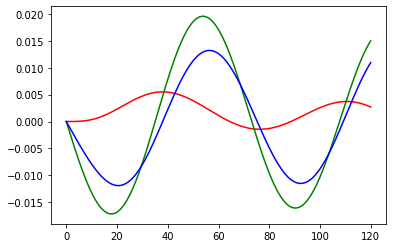

In [41]:
analyze("by_euler.txt", show_delta=True)

Minor anomoly with line  :: Done with steps

Max time is 120.0


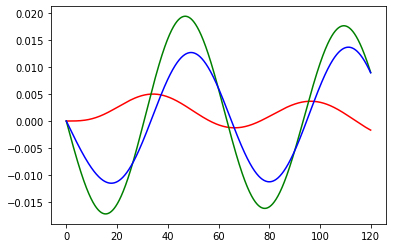

In [42]:
analyze("by_euler_wrong_omega.txt", show_delta=True)

Minor anomoly with line  :: Done with steps

Max time is 120.0


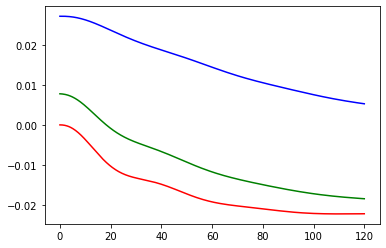

In [43]:
analyze("by_euler_simple.txt", show_delta=True)

Minor anomoly with line  :: Done with steps

Max time is 120.0


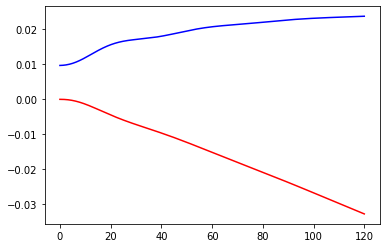

In [44]:
analyze("by_euler_really_simple_2.txt")

Minor anomoly with line  :: Done with steps

Max time is 120.0


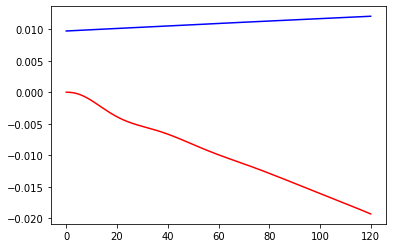

In [45]:
analyze("by_euler_really_simple_3.txt")

Minor anomoly with line  :: Done with steps

Max time is 120.0


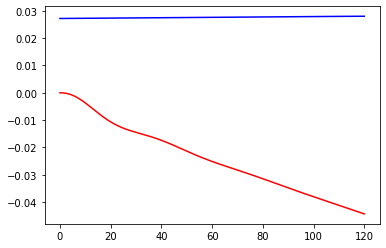

In [46]:
analyze("by_euler_really_simple.txt")

Minor anomoly with line  :: Uh oh, better provide some information!

Max time is 1080.75


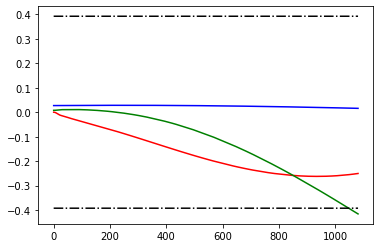

In [47]:
analyze("by_euler_really_simple_long.txt", show_bounds=True, show_delta=True)

In [48]:
quaternions.Quaternion(0.9271931,   0.3739171,   0.0206473,  -0.0085174).get_euler()

[0.766651067420471, 0.044672528061480726, -0.00035414526318724906]

Minor anomoly with line  :: Uh oh, better provide some information!

Max time is 1080.75


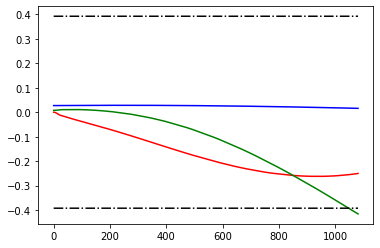

In [49]:
analyze("by_euler_really_simple_4.txt", show_bounds=True, show_delta=True)

Minor anomoly with line  :: Uh oh, better provide some information!

Max time is 771.6


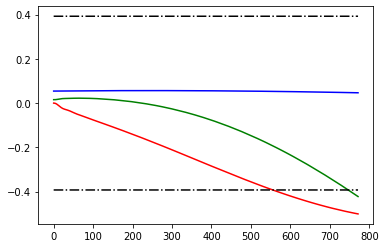

In [50]:
analyze("by_euler_really_simple_5.txt", show_bounds=True, show_delta=True)

Minor anomoly with line  :: Uh oh, better provide some information!

Max time is 573.65


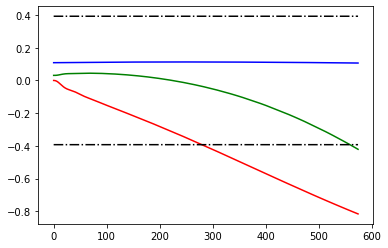

In [51]:
analyze("by_euler_really_simple_6.txt", show_bounds=True, show_delta=True)

Minor anomoly with line  :: Ticket please:

Minor anomoly with line  :controller answers: {november72938india:GMIcPxM3sUHoLbJ7CRQbX1WvQiz2kYEngalm-o-4NyjC3Q3Q3ETJnRt1P6GYvRT_TQ}

Max time is 120.0


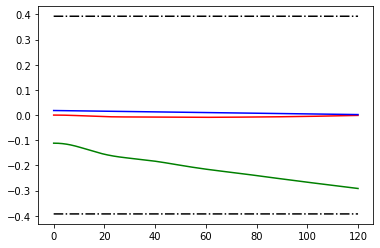

In [52]:
analyze("by_euler_really_simple_live.txt", show_bounds=True, show_delta=True)

Minor anomoly with line  :: Ticket please:

Minor anomoly with line  :controller answers: {november72938india:GMIcPxM3sUHoLbJ7CRQbX1WvQiz2kYEngalm-o-4NyjC3Q3Q3ETJnRt1P6GYvRT_TQ}

Minor anomoly with line  :: Timeout Goodbye

Max time is 120.0


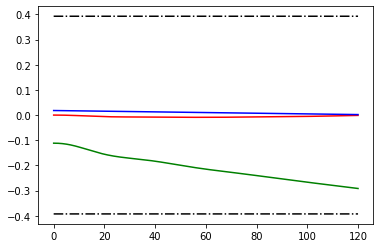

In [53]:
analyze("by_euler_really_simple_live_2.txt", show_bounds=True, show_delta=True)

Minor anomoly with line  :: Ticket please:

Minor anomoly with line  :controller answers: {november72938india:GMIcPxM3sUHoLbJ7CRQbX1WvQiz2kYEngalm-o-4NyjC3Q3Q3ETJnRt1P6GYvRT_TQ}

Minor anomoly with line  :: Timeout Goodbye

Max time is 120.0


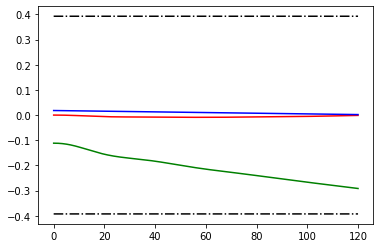

In [54]:
analyze("by_euler_really_simple_live_2.txt", show_bounds=True, show_delta=True)

Minor anomoly with line  :: Ticket please:

Minor anomoly with line  :controller answers: {november72938india:GMIcPxM3sUHoLbJ7CRQbX1WvQiz2kYEngalm-o-4NyjC3Q3Q3ETJnRt1P6GYvRT_TQ}

Minor anomoly with line  :: Timeout Goodbye

Max time is 120.0


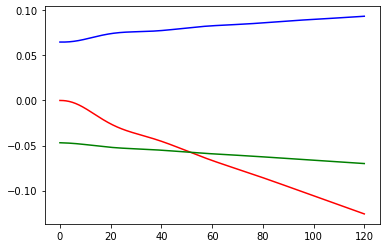

In [55]:
analyze("by_euler_really_simple_live_3.txt", show_delta=True)

Minor anomoly with line  :: Ticket please:

Minor anomoly with line  :controller answers: {november72938india:GMIcPxM3sUHoLbJ7CRQbX1WvQiz2kYEngalm-o-4NyjC3Q3Q3ETJnRt1P6GYvRT_TQ}

Minor anomoly with line  :: Timeout Goodbye

Max time is 120.0


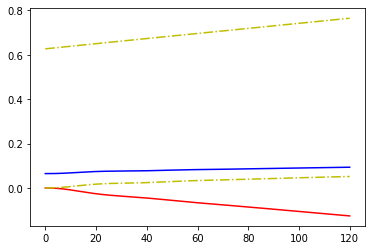

In [56]:
analyze("by_euler_really_simple_live_3.txt", show_other_comps=True)

Minor anomoly with line  :: Done with steps

Max time is 1200.0


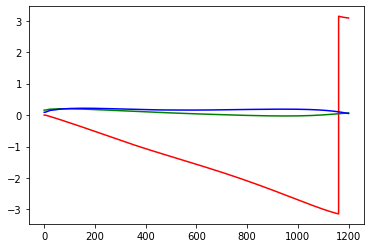

In [57]:
analyze("by_euler_really_simple_big_perturbation.txt", show_delta=True)

Minor anomoly with line  :: Uh oh, better provide some information!

Max time is 153.95000000000002


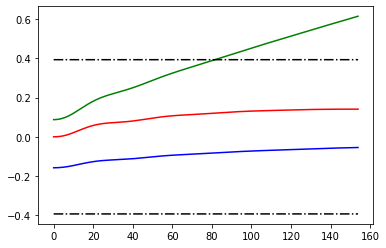

In [62]:
analyze("by_euler_really_simple_big_perturbation_2.txt", show_delta=True, show_bounds=True)

Minor anomoly with line  :: Uh oh, better provide some information!

Max time is 140.1


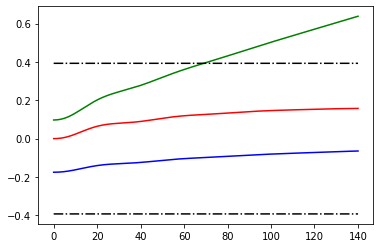

In [59]:
analyze("by_euler_really_simple_big_perturbation_3.txt", show_delta=True, show_bounds=True)

Minor anomoly with line  :: Uh oh, better provide some information!

Max time is 97.55000000000001


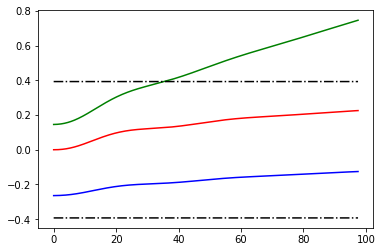

In [60]:
analyze("by_euler_really_simple_big_perturbation_4.txt", show_delta=True, show_bounds=True)

Minor anomoly with line  :: Ticket please:

Minor anomoly with line  :controller answers: {november72938india:GMIcPxM3sUHoLbJ7CRQbX1WvQiz2kYEngalm-o-4NyjC3Q3Q3ETJnRt1P6GYvRT_TQ}

Minor anomoly with line  :: Uh oh, better provide some information!

Max time is 98.7


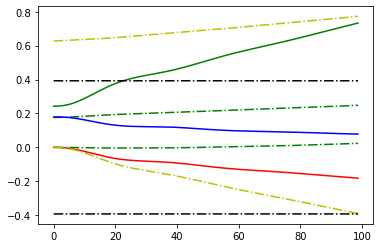

In [61]:
analyze("by_euler_really_simple_big_perturbation_live.txt", show_delta=True, show_bounds=True, show_other_comps=True)